<hr style="border:5px solid #FFFF00">

# Practical Example - Dates, Times, and Time Zones <hr style="border:4.5px solid #FFFF00">

### Main Task:
Obtain information about the product sales of the various retailer types in UTC offset. Display the average amount of sales that occurred in each time zone.
<br>
### Solution map:
- **Subtask 1:** Store the date and time values in a single column called "MOS", denoting "Moment of Sale". Verify that the time zone values stored in "sales_data" are valid and can be manipulated with the pytz module. *(Data Preparation)*
- **Subtask 2:** Estimate the offset of the values of "MOS" to UTC. Store them in a column called "OffsetUTC".  *(Data Manipulation)*
- **Subtask 3:** Order all sales according to a reconciled UTC-equivalent of the moment of sale and analyze the data. *(Data Analysis)*
- **Subtask 4:** Obtain statistics and visualizations that will respond to the Main Task and further improve the analysis of your data. *(Data Visualization)*

## Introduction

In [1]:
import pandas as pd
import pytz
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('Sales-products-tz-mod.csv', index_col = 'SaleID')
sales_data = data.copy()
sales_data

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone
SaleID,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,06/01/2020,23:20:56,EST
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,05/02/2020,17:27:08,EST
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,30/10/2020,09:04:43,EST
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,13/11/2020,04:25:06,EST
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,06/12/2020,11:15:47,CET
...,...,...,...,...,...,...,...
SaleID_96,Australia,Sports Store,Mountain Man Extreme,24.0,23/07/2019,12:30:03,Australia/West
SaleID_97,Australia,Department Store,Firefly Mapreader,1200.0,03/01/2019,01:39:14,Australia/West
SaleID_98,Australia,Discount Retailer,Polar Sun,32.0,14/02/2019,21:29:35,Australia/West


In [3]:
sales_data[['DateOfSale', "TimeOfSale", "TimeZone"]].head()

,DateOfSale,TimeOfSale,TimeZone
SaleID,,,
SaleID_1,06/01/2020,23:20:56,EST
SaleID_2,05/02/2020,17:27:08,EST
SaleID_3,30/10/2020,09:04:43,EST
SaleID_4,13/11/2020,04:25:06,EST
SaleID_5,06/12/2020,11:15:47,CET


## Part I - Data Preparation

- **Subtask 1:** Store the date and time values in a single column called 'MOS', denoting 'Moment of Sale'. Verify that the time zone values stored in "sales_data" are valid and can be manipulated with the pytz module. *(Data Preparation)*

In [4]:
date_and_time = sales_data['DateOfSale'] + " " + sales_data['TimeOfSale']
date_and_time 

SaleID
SaleID_1      06/01/2020 23:20:56
SaleID_2      05/02/2020 17:27:08
SaleID_3      30/10/2020 09:04:43
SaleID_4      13/11/2020 04:25:06
SaleID_5      06/12/2020 11:15:47
                     ...         
SaleID_96     23/07/2019 12:30:03
SaleID_97     03/01/2019 01:39:14
SaleID_98     14/02/2019 21:29:35
SaleID_99     19/06/2020 11:16:19
SaleID_100    25/05/2019 15:51:41
Length: 100, dtype: object

In [5]:
sales_data['MOS'] = pd.to_datetime(date_and_time)
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone,MOS
SaleID,,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,06/01/2020,23:20:56,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,05/02/2020,17:27:08,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,30/10/2020,09:04:43,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,13/11/2020,04:25:06,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,06/12/2020,11:15:47,CET,2020-06-12 11:15:47


In [6]:
sales_data = sales_data.drop(['DateOfSale','TimeOfSale'], axis = 1)
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS
SaleID,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,CET,2020-06-12 11:15:47


In [13]:
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [14]:
sales_data['TimeZone'].unique()

array(['EST', 'CET', 'GMT', 'EET', 'Singapore', 'Australia/West'],
      dtype=object)

In [15]:
for i in sales_data['TimeZone'].unique():
    if i in (pytz.all_timezones):
        print (True)
    else:
        print (False)

True
True
True
True
True
True


In [16]:
sales_data['TimeZone'].unique()

array(['EST', 'CET', 'GMT', 'EET', 'Singapore', 'Australia/West'],
      dtype=object)

In [17]:
sales_data.loc[:, 'TimeZone'] = sales_data.loc[:, 'TimeZone'].replace({'SGT': 'Singapore'})

In [18]:
sales_data['TimeZone'].unique()

array(['EST', 'CET', 'GMT', 'EET', 'Singapore', 'Australia/West'],
      dtype=object)

In [19]:
for i in sales_data['TimeZone'].unique():
    if i in (pytz.all_timezones):
        print (True)
    else:
        print (False)

True
True
True
True
True
True


In [20]:
sales_data[sales_data['TimeZone'] == 'Singapore']

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS
SaleID,,,,,,
SaleID_18,Singapore,Outdoors Shop,Granite Pulley,19.00,Singapore,2019-02-01 01:32:09
SaleID_19,Singapore,Outdoors Shop,Firefly Climbing Lamp,23.45,Singapore,2019-02-20 07:07:10
SaleID_20,Singapore,Outdoors Shop,Granite Ice,65.00,Singapore,2019-10-04 10:27:26
SaleID_21,Singapore,Outdoors Shop,Mountain Man Analog,10.00,Singapore,2019-10-07 05:20:29
SaleID_22,Singapore,Outdoors Shop,Mountain Man Digital,12.00,Singapore,2020-03-05 09:54:41
SaleID_23,Singapore,Outdoors Shop,Mountain Man Deluxe,19.00,Singapore,2019-07-25 06:51:57
SaleID_81,Singapore,Warehouse Store,EverGlow Kerosene,23.06,Singapore,2019-10-11 12:50:36
SaleID_82,Singapore,Outdoors Shop,TX,50.00,Singapore,2019-09-25 19:48:39


In [21]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
sales_data

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS
SaleID,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.00,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.00,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.00,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.00,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.50,CET,2020-06-12 11:15:47
SaleID_6,Italy,Outdoors Shop,Firefly 4,1300.00,CET,2020-07-06 01:54:41
SaleID_7,United Kingdom,Outdoors Shop,Husky Rope 50,270.00,GMT,2020-12-27 02:07:28
SaleID_8,United Kingdom,Outdoors Shop,Granite Signal Mirror,499.99,GMT,2020-09-15 11:44:57
SaleID_9,United Kingdom,Outdoors Shop,Granite Carabiner,32.00,GMT,2020-09-23 01:40:29


## Part II - Data Manipulation

- **Subtask 2:** Estimate the offset of the values of "MOS" to UTC. Store them in a column called "OffsetUTC". *(Data Manipulation)*

In [22]:
sales_data['MOS'].iloc[0]

Timestamp('2020-06-01 23:20:56')

In [23]:
sales_data['MOS'].iloc[0].tz_localize(sales_data['TimeZone'].iloc[0])

Timestamp('2020-06-01 23:20:56-0500', tz='EST')

In [24]:
list_mos_timestamps = []
list_mos_timestamps

[]

In [25]:
for i in range(len(sales_data)):
    list_mos_timestamps.append(pd.to_datetime(sales_data['MOS'].iloc[i].tz_localize(sales_data['TimeZone'].iloc[i], ambiguous='raise', nonexistent='raise')))

In [26]:
list_mos_timestamps[:10]

[Timestamp('2020-06-01 23:20:56-0500', tz='EST'),
 Timestamp('2020-05-02 17:27:08-0500', tz='EST'),
 Timestamp('2020-10-30 09:04:43-0500', tz='EST'),
 Timestamp('2020-11-13 04:25:06-0500', tz='EST'),
 Timestamp('2020-06-12 11:15:47+0200', tz='CET'),
 Timestamp('2020-07-06 01:54:41+0200', tz='CET'),
 Timestamp('2020-12-27 02:07:28+0000', tz='GMT'),
 Timestamp('2020-09-15 11:44:57+0000', tz='GMT'),
 Timestamp('2020-09-23 01:40:29+0000', tz='GMT'),
 Timestamp('2020-06-24 18:43:04+0200', tz='CET')]

In [27]:
list_mos_timestamps

[Timestamp('2020-06-01 23:20:56-0500', tz='EST'),
 Timestamp('2020-05-02 17:27:08-0500', tz='EST'),
 Timestamp('2020-10-30 09:04:43-0500', tz='EST'),
 Timestamp('2020-11-13 04:25:06-0500', tz='EST'),
 Timestamp('2020-06-12 11:15:47+0200', tz='CET'),
 Timestamp('2020-07-06 01:54:41+0200', tz='CET'),
 Timestamp('2020-12-27 02:07:28+0000', tz='GMT'),
 Timestamp('2020-09-15 11:44:57+0000', tz='GMT'),
 Timestamp('2020-09-23 01:40:29+0000', tz='GMT'),
 Timestamp('2020-06-24 18:43:04+0200', tz='CET'),
 Timestamp('2019-05-19 02:12:30+0200', tz='CET'),
 Timestamp('2019-05-04 07:38:10-0500', tz='EST'),
 Timestamp('2020-01-24 08:51:28-0500', tz='EST'),
 Timestamp('2019-07-12 08:14:53-0500', tz='EST'),
 Timestamp('2020-01-13 05:32:40-0500', tz='EST'),
 Timestamp('2020-11-26 10:17:48+0200', tz='EET'),
 Timestamp('2020-01-23 19:36:25+0200', tz='EET'),
 Timestamp('2019-02-01 01:32:09+0800', tz='Singapore'),
 Timestamp('2019-02-20 07:07:10+0800', tz='Singapore'),
 Timestamp('2019-10-04 10:27:26+0800',

In [28]:
list_mos_timestamps[0].strftime('%Y-%m-%d %H:%M:%S')

'2020-06-01 23:20:56'

In [29]:
list_mos_timestamps[0].strftime('%z')

'-0500'

In [30]:
float(list_mos_timestamps[0].strftime('%z'))/100

-5.0

In [31]:
list_mos_timestamps[0].date()

datetime.date(2020, 6, 1)

In [32]:
list_mos_timestamps[0].time()

datetime.time(23, 20, 56)

In [33]:
list_mos_timestamps[0].utcoffset()

datetime.timedelta(days=-1, seconds=68400)

In [34]:
list_mos_timestamps[0].utcoffset().total_seconds() / 3600

-5.0

In [35]:
sales_data['OffsetUTC'] = [list_mos_timestamps[i].utcoffset().total_seconds() / 3600 for i in range(len(sales_data))]
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS,OffsetUTC
SaleID,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,EST,2020-06-01 23:20:56,-5.0
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,EST,2020-05-02 17:27:08,-5.0
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,EST,2020-10-30 09:04:43,-5.0
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,EST,2020-11-13 04:25:06,-5.0
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,CET,2020-06-12 11:15:47,2.0


In [36]:
column_names_reordered = ['RetailerCountry', 'MOS', 'TimeZone', 'OffsetUTC', 'RetailerType', 'Product', 'Sales Revenue ($)']
sales_data = sales_data[column_names_reordered]
sales_data.head()

,RetailerCountry,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,
SaleID_1,United States,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [37]:
sales_data.groupby(['TimeZone', 'OffsetUTC']).count()

RetailerCountry  MOS  RetailerType  Product  \
TimeZone       OffsetUTC                                                
Australia/West  8.0                    17   17            17       17   
CET             1.0                     6    6             6        6   
                2.0                    10   10            10       10   
EET             2.0                     4    4             4        4   
                3.0                     4    4             4        4   
EST            -5.0                    40   40            40       40   
GMT             0.0                    11   11            11       11   
Singapore       8.0                     8    8             8        8   

                          Sales Revenue ($)  
TimeZone       OffsetUTC                     
Australia/West  8.0                      17  
CET             1.0                       6  
                2.0                      10  
EET             2.0                       4  
                3.0                       4  
EST            -5.0                      40  
GMT             0.0                      11  
Singapore       8.0                       8

In [38]:
sales_data[sales_data['TimeZone']=='CET'].sort_values('OffsetUTC')

,RetailerCountry,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,
SaleID_31,Germany,2019-02-24 19:16:17,CET,1.0,Online Retailer,Firefly Climbing Lamp,23.00
SaleID_73,Switzerland,2019-03-26 09:52:36,CET,1.0,Mall,Course Pro Umbrella,100.32
SaleID_74,Switzerland,2020-03-07 14:17:34,CET,1.0,Mall,Course Pro Golf Bag,620.00
SaleID_75,Switzerland,2019-03-14 22:25:10,CET,1.0,Mall,Course Pro Gloves,40.50
SaleID_77,Austria,2020-11-05 13:06:45,CET,1.0,Department Store,Infinity,3100.00
SaleID_80,Austria,2020-12-05 05:30:58,CET,1.0,Warehouse Store,EverGlow Single,24.90
SaleID_5,Italy,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.50
SaleID_6,Italy,2020-07-06 01:54:41,CET,2.0,Outdoors Shop,Firefly 4,1300.00
SaleID_10,Italy,2020-06-24 18:43:04,CET,2.0,Outdoors Shop,Granite Grip,220.00


## Part III - Data Analysis

- **Subtask 3:** Order all sales according to a reconciled UTC-equivalent of the moment of sale and analyze the data. *(Data Analysis)*

In [39]:
sales_data.sort_values(['MOS'])

,RetailerCountry,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,
SaleID_60,Canada,2019-01-02 23:10:36,EST,-5.0,Outdoors Shop,Polar Sun,32.00
SaleID_33,Canada,2019-01-16 13:33:16,EST,-5.0,Outdoors Shop,Venue,110.00
SaleID_87,Australia,2019-01-19 04:29:44,Australia/West,8.0,Sports Store,Star Peg,37.85
SaleID_18,Singapore,2019-02-01 01:32:09,Singapore,8.0,Outdoors Shop,Granite Pulley,19.00
SaleID_98,Australia,2019-02-14 21:29:35,Australia/West,8.0,Discount Retailer,Polar Sun,32.00
SaleID_19,Singapore,2019-02-20 07:07:10,Singapore,8.0,Outdoors Shop,Firefly Climbing Lamp,23.45
SaleID_31,Germany,2019-02-24 19:16:17,CET,1.0,Online Retailer,Firefly Climbing Lamp,23.00
SaleID_97,Australia,2019-03-01 01:39:14,Australia/West,8.0,Department Store,Firefly Mapreader,1200.00
SaleID_53,Canada,2019-03-01 15:40:25,EST,-5.0,Sports Store,Opera Vision,450.00


In [43]:
sales_data['MOS-UTC'] = [pd.to_datetime(sales_data['MOS'].iloc[i]).tz_localize(sales_data['TimeZone'].iloc[i]).tz_convert('UTC') 
                        for i in range(len(sales_data))]

In [44]:
sales_data.head()

,RetailerCountry,MOS-UTC,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [45]:
column_names_reordered = ['RetailerCountry', 'MOS-UTC', 'MOS', 'TimeZone', 'OffsetUTC', 'RetailerType', 'Product', 'Sales Revenue ($)']
sales_data = sales_data[column_names_reordered]
sales_data.head()

,RetailerCountry,MOS-UTC,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [46]:
sales_data.sort_values(['MOS-UTC'])

,RetailerCountry,MOS-UTC,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_60,Canada,2019-01-03 04:10:36+00:00,2019-01-02 23:10:36,EST,-5.0,Outdoors Shop,Polar Sun,32.00
SaleID_33,Canada,2019-01-16 18:33:16+00:00,2019-01-16 13:33:16,EST,-5.0,Outdoors Shop,Venue,110.00
SaleID_87,Australia,2019-01-18 20:29:44+00:00,2019-01-19 04:29:44,Australia/West,8.0,Sports Store,Star Peg,37.85
SaleID_18,Singapore,2019-01-31 17:32:09+00:00,2019-02-01 01:32:09,Singapore,8.0,Outdoors Shop,Granite Pulley,19.00
SaleID_98,Australia,2019-02-14 13:29:35+00:00,2019-02-14 21:29:35,Australia/West,8.0,Discount Retailer,Polar Sun,32.00
SaleID_19,Singapore,2019-02-19 23:07:10+00:00,2019-02-20 07:07:10,Singapore,8.0,Outdoors Shop,Firefly Climbing Lamp,23.45
SaleID_31,Germany,2019-02-24 18:16:17+00:00,2019-02-24 19:16:17,CET,1.0,Online Retailer,Firefly Climbing Lamp,23.00
SaleID_97,Australia,2019-02-28 17:39:14+00:00,2019-03-01 01:39:14,Australia/West,8.0,Department Store,Firefly Mapreader,1200.00
SaleID_53,Canada,2019-03-01 20:40:25+00:00,2019-03-01 15:40:25,EST,-5.0,Sports Store,Opera Vision,450.00


In [47]:
sales_data.groupby('TimeZone').mean()

,OffsetUTC,Sales Revenue ($)
TimeZone,,
Australia/West,8.000,273.105882
CET,1.625,415.710000
EET,2.500,586.687500
EST,-5.000,230.385500
GMT,0.000,115.137273
Singapore,8.000,27.688750


In [48]:
sales_data.groupby('TimeZone').count()

,RetailerCountry,MOS-UTC,MOS,OffsetUTC,RetailerType,Product,Sales Revenue ($)
TimeZone,,,,,,,
Australia/West,17,17,17,17,17,17,17
CET,16,16,16,16,16,16,16
EET,8,8,8,8,8,8,8
EST,40,40,40,40,40,40,40
GMT,11,11,11,11,11,11,11
Singapore,8,8,8,8,8,8,8


In [49]:
sales_data.groupby(['TimeZone', 'OffsetUTC']).count()

RetailerCountry  MOS-UTC  MOS  RetailerType  \
TimeZone       OffsetUTC                                                
Australia/West  8.0                    17       17   17            17   
CET             1.0                     6        6    6             6   
                2.0                    10       10   10            10   
EET             2.0                     4        4    4             4   
                3.0                     4        4    4             4   
EST            -5.0                    40       40   40            40   
GMT             0.0                    11       11   11            11   
Singapore       8.0                     8        8    8             8   

                          Product  Sales Revenue ($)  
TimeZone       OffsetUTC                              
Australia/West  8.0            17                 17  
CET             1.0             6                  6  
                2.0            10                 10  
EET             2.0             4                  4  
                3.0             4                  4  
EST            -5.0            40                 40  
GMT             0.0            11                 11  
Singapore       8.0             8                  8

In [50]:
sales_data.groupby('TimeZone').count().sort_values('Product', ascending = False)

,RetailerCountry,MOS-UTC,MOS,OffsetUTC,RetailerType,Product,Sales Revenue ($)
TimeZone,,,,,,,
EST,40,40,40,40,40,40,40
Australia/West,17,17,17,17,17,17,17
CET,16,16,16,16,16,16,16
GMT,11,11,11,11,11,11,11
EET,8,8,8,8,8,8,8
Singapore,8,8,8,8,8,8,8


## Part IV - Data Visualization

- **Subtask 4:** Obtain statistics and visualizations that will respond to the Main Task and further improve the analysis of yout data. *(Data Visualization)*

In [51]:
sales_data.head()

,RetailerCountry,MOS-UTC,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [52]:
sales_data_viz = sales_data.reset_index()
sales_data_viz.head()

,SaleID,RetailerCountry,MOS-UTC,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
0,SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
1,SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
2,SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
3,SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
4,SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [53]:
sales_data_viz = sales_data_viz.set_index('MOS-UTC').sort_index()
sales_data_viz.head()

,SaleID,RetailerCountry,MOS,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
MOS-UTC,,,,,,,,
2019-01-03 04:10:36+00:00,SaleID_60,Canada,2019-01-02 23:10:36,EST,-5.0,Outdoors Shop,Polar Sun,32.00
2019-01-16 18:33:16+00:00,SaleID_33,Canada,2019-01-16 13:33:16,EST,-5.0,Outdoors Shop,Venue,110.00
2019-01-18 20:29:44+00:00,SaleID_87,Australia,2019-01-19 04:29:44,Australia/West,8.0,Sports Store,Star Peg,37.85
2019-01-31 17:32:09+00:00,SaleID_18,Singapore,2019-02-01 01:32:09,Singapore,8.0,Outdoors Shop,Granite Pulley,19.00
2019-02-14 13:29:35+00:00,SaleID_98,Australia,2019-02-14 21:29:35,Australia/West,8.0,Discount Retailer,Polar Sun,32.00


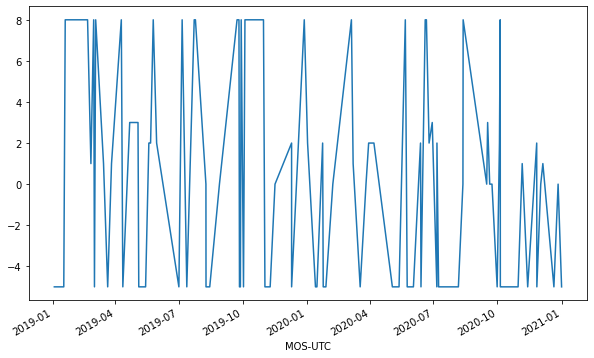

In [54]:
sales_data_viz['OffsetUTC'].plot(figsize=(10, 6))

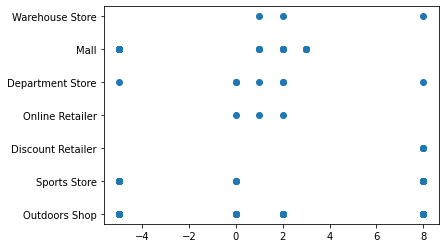

In [55]:
plt.scatter(sales_data_viz['OffsetUTC'], sales_data_viz['RetailerType'])

In [56]:
sales_data_viz.groupby('TimeZone').sum()

,OffsetUTC,Sales Revenue ($)
TimeZone,,
Australia/West,136.0,4642.80
CET,26.0,6651.36
EET,20.0,4693.50
EST,-200.0,9215.42
GMT,0.0,1266.51
Singapore,64.0,221.51


In [57]:
total_sales_revenue_by_time_zone = sales_data_viz.groupby('TimeZone').sum()
total_sales_revenue_by_time_zone

,OffsetUTC,Sales Revenue ($)
TimeZone,,
Australia/West,136.0,4642.80
CET,26.0,6651.36
EET,20.0,4693.50
EST,-200.0,9215.42
GMT,0.0,1266.51
Singapore,64.0,221.51


<BarContainer object of 6 artists>

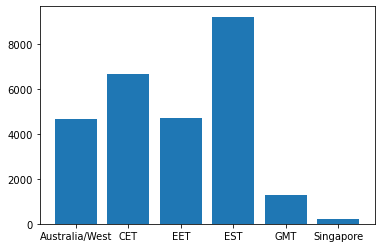

In [58]:
plt.bar(total_sales_revenue_by_time_zone.index, 
        height = total_sales_revenue_by_time_zone['Sales Revenue ($)'])

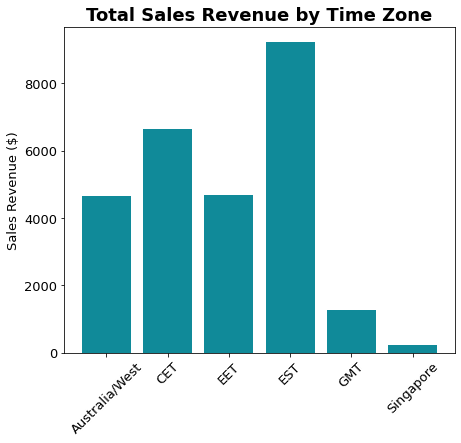

In [59]:
plt.figure(figsize = (7, 6)) 

plt.bar(total_sales_revenue_by_time_zone.index, 
        height = total_sales_revenue_by_time_zone['Sales Revenue ($)'], 
        color = "#108A99") 

plt.xticks(rotation = 45, fontsize = 13) 
plt.yticks(fontsize = 13) 
plt.title("Total Sales Revenue by Time Zone", fontsize = 18, fontweight = "bold") 
plt.ylabel("Sales Revenue ($)", fontsize = 13 ) 

plt.show() 

In [60]:
sales_data_viz.groupby(['TimeZone','OffsetUTC']).mean()

Sales Revenue ($)
TimeZone       OffsetUTC                   
Australia/West  8.0              273.105882
CET             1.0              651.453333
                2.0              274.264000
EET             2.0              223.125000
                3.0              950.250000
EST            -5.0              230.385500
GMT             0.0              115.137273
Singapore       8.0               27.688750

In [61]:
sales_data_viz.groupby(['TimeZone']).mean()

,OffsetUTC,Sales Revenue ($)
TimeZone,,
Australia/West,8.000,273.105882
CET,1.625,415.710000
EET,2.500,586.687500
EST,-5.000,230.385500
GMT,0.000,115.137273
Singapore,8.000,27.688750


In [62]:
sales_data_viz.groupby('TimeZone').mean().sort_values('Sales Revenue ($)')

,OffsetUTC,Sales Revenue ($)
TimeZone,,
Singapore,8.000,27.688750
GMT,0.000,115.137273
EST,-5.000,230.385500
Australia/West,8.000,273.105882
CET,1.625,415.710000
EET,2.500,586.687500


In [63]:
averages_by_time_zone = sales_data_viz.groupby('TimeZone').mean().sort_values('Sales Revenue ($)', ascending = False)
averages_by_time_zone

,OffsetUTC,Sales Revenue ($)
TimeZone,,
EET,2.500,586.687500
CET,1.625,415.710000
Australia/West,8.000,273.105882
EST,-5.000,230.385500
GMT,0.000,115.137273
Singapore,8.000,27.688750


<BarContainer object of 6 artists>

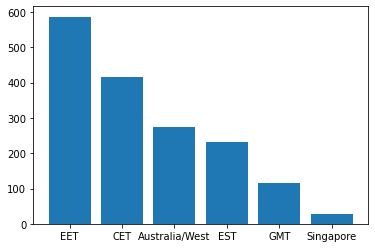

In [64]:
plt.bar(averages_by_time_zone.index, 
        height = averages_by_time_zone['Sales Revenue ($)'])

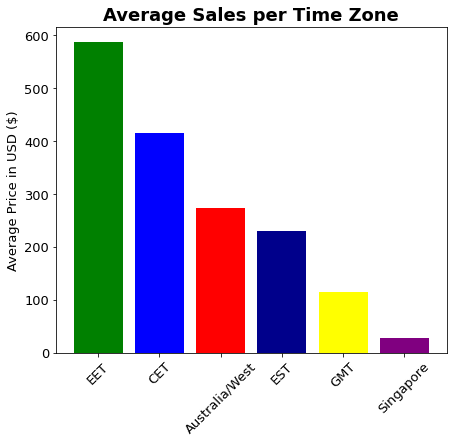

In [65]:
plt.figure(figsize = (7, 6))

plt.bar(averages_by_time_zone.index, 
        height = averages_by_time_zone['Sales Revenue ($)'], 
        color = ["green", "blue", "red", "darkblue", "yellow", "purple"]) 

plt.xticks(rotation = 45, fontsize = 13) 
plt.yticks(fontsize = 13) 
plt.title("Average Sales per Time Zone", fontsize = 18, fontweight = "bold") 
plt.ylabel("Average Price in USD ($)", fontsize = 13 ) 

plt.show() 

****